<a href="https://colab.research.google.com/github/dataSci-rigo/w207-projects/blob/master/Copy_of_w207_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

np.random.seed(0)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#drive=GoogleDrive(4/iQEapMjjZP0ngyzZdGQsb1VhT8Hy3GEhw3R3CHr4yo4GFPHi08aFUUk)

In [0]:

test_csv_link = 'https://drive.google.com/open?id=1HB3mJo_2EVewP9oqHtlcDCfw6y01om63' # shareable link
train_csv_link = 'https://drive.google.com/open?id=1DiE4w94eJDEXxn87npDd5o6Y3QFdzzIU' # shareable link

_, test_id = test_csv_link.split('=')
_, train_id = train_csv_link.split('=')
# print (test_id) # Verify that you have everything after '='
# print (train_id) # Verify that you have everything after '='

downloaded_test = drive.CreateFile({'id':test_id})
downloaded_train = drive.CreateFile({'id':train_id}) 
downloaded_test.GetContentFile('test.csv')
downloaded_train.GetContentFile('train.csv')

# **EDA**

In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("train shape: {}".format(train_df.shape))
print("test shape: {}".format(test_df.shape))

# Convert Image from string to np array of floats between 0 and 1
train_df.Image = train_df.Image.apply(lambda x: np.array(object=x.split(' '), 
                                                         dtype=float)) / 255
test_df.Image = test_df.Image.apply(lambda x: np.array(object=x.split(' '), 
                                                       dtype=float)) / 255

train shape: (7049, 31)
test shape: (1783, 2)


In [0]:
train_df.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [0]:
test_df.head()

,ImageId,Image
0,1,"[0.7137254901960784, 0.7176470588235294, 0.713..."
1,2,"[0.2980392156862745, 0.3411764705882353, 0.317..."
2,3,"[0.6941176470588235, 0.6901960784313725, 0.682..."
3,4,"[0.6901960784313725, 0.6823529411764706, 0.682..."
4,5,"[0.19607843137254902, 0.1843137254901961, 0.17..."


## **Check for Missing Data**


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [0]:
### pull out examples of missing data
# left_eye_center_x

train_df[train_df['left_eye_center_x'].isnull() == True]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
1687,NaN,NaN,NaN,NaN,57.931068,40.808627,73.232712,44.910035,NaN,NaN,19.393354,30.279554,59.362578,35.177498,76.553349,40.842495,38.311092,28.608206,19.365442,23.906166,42.174021,55.500993,54.595918,74.511943,24.118659,68.652754,39.136317,71.487238,37.405514,75.520178,"[0.20784313725490197, 0.21568627450980393, 0.2..."
1834,NaN,NaN,NaN,NaN,41.122383,43.111925,49.822688,39.401949,28.818827,47.168082,NaN,NaN,31.916349,35.952397,50.125814,29.714780,25.437982,40.986264,17.361909,42.430765,27.017399,63.240190,54.380973,63.966847,31.776519,74.325852,37.135567,70.228468,41.736649,76.507387,"[0.26666666666666666, 0.26666666666666666, 0.2..."
1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.020743,32.837738,74.912546,43.573637,45.832051,28.651723,19.829508,30.793978,51.427229,53.877310,57.458039,80.878314,32.511208,76.078956,45.435075,76.046196,44.288471,79.993791,"[0.09803921568627451, 0.09019607843137255, 0.0..."
1938,NaN,NaN,NaN,NaN,59.603142,41.750697,75.085986,49.088207,38.232536,33.229570,24.102628,29.247888,57.789811,34.389546,81.221553,41.262194,40.284481,29.782881,20.665065,18.502775,34.447805,62.884158,49.917692,82.619275,21.997412,69.704035,35.746465,78.990190,34.873289,81.526558,"[0.16470588235294117, 0.1607843137254902, 0.17..."
2100,NaN,NaN,46.180446,38.001579,67.601641,41.736941,77.647986,42.364153,50.589530,38.493913,40.457143,37.580337,NaN,NaN,NaN,NaN,58.093771,34.185342,36.910169,30.827471,64.842080,60.458789,66.114101,75.403698,39.672788,73.862758,55.859308,71.557480,52.268891,84.015333,"[0.13725490196078433, 0.06274509803921569, 0.1..."
2137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.476893,29.793548,42.880843,29.448058,29.147597,27.223963,43.623302,51.613917,54.875576,67.435945,37.504147,60.976959,44.479263,60.917972,45.482028,68.394470,"[0.06666666666666667, 0.06666666666666667, 0.0..."
2153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.539810,53.724863,63.036965,68.311584,37.544582,70.934866,52.036102,69.475137,52.268813,70.702156,"[0.17647058823529413, 0.2, 0.25098039215686274..."
2175,NaN,NaN,66.786621,39.081633,NaN,NaN,NaN,NaN,70.714966,38.542177,61.428580,39.055628,79.787831,34.689191,84.716629,32.914134,76.582388,32.175964,58.418216,31.673318,88.850000,50.219898,NaN,NaN,74.017993,68.806327,83.989082,66.173401,84.979218,67.902653,"[0.0, 0.0, 0.00392156862745098, 0.0, 0.0, 0.00..."
2186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.557864,27.709876,NaN,NaN,37.708376,57.979672,73.062903,68.390158,NaN,NaN,49.711997,71.270341,50.830746,77.197330,"[0.6980392156862745, 0.6901960784313725, 0.682..."
2239,NaN,NaN,31.925567,35.312088,57.229069,39.959582,NaN,NaN,38.241712,38.002787,24.544151,35.164360,NaN,NaN,NaN,NaN,39.611050,30.456446,20.641613,26.187656,48.210313,55.102877,58.146540,71.447188,32.288900,69.744848,46.050971,72.038527,46.033051,73.830463,"[0.0196078431372549, 0.027450980392156862, 0.0..."


## **Forward Fill Missing Data**

Since the data has multiple columns of missing information we are going to input them using the forward fill method.

In [0]:
train_df.fillna(method = 'ffill', inplace = True)
test_df.fillna(method = 'ffill', inplace = True)

# **Split train into train/dev sets**

In [0]:
from sklearn.model_selection import train_test_split
#Splitting the data into a 75/25 training and dev split
#Using random state 0 for reproducibility
train, dev = train_test_split(train_df, test_size=0.25, random_state = 0)

# **Print a few images to validate the data**


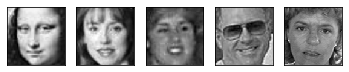

In [0]:
train_images=np.concatenate(np.array(train.Image.values)).ravel().reshape(5286,9216)
dev_images_raw=np.concatenate(dev['Image'].values).ravel().reshape(dev.Image.values.shape[0],9216)

def plot_example(num_examples,train):
  
  for i in range(num_examples):
    ax = plt.subplot(1,num_examples,i+1)
    ax.imshow(train[i].reshape(96,96),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plot_example(5,train_images)

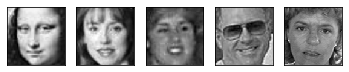

In [0]:
def plot_example(num_examples):
  
  for i in range(num_examples):
    ax = plt.subplot(1,num_examples,i+1)
    ax.imshow(train.Image.iloc[i].reshape(96,96),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plot_example(5)

In [0]:

train_left_eye_x=np.array(train['left_eye_center_x'].values)

dev_left_eye_x=dev['left_eye_center_x'].values

In [0]:
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
#from sklearn.grid_search import GridSearchCV
#from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics

In [0]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(np.round(train_left_eye_x,3))
dev_encoded = lab_enc.fit_transform(np.round(dev_left_eye_x,3))

# **Model for Left Eye Center X**
##K-Nearest Neighbors

In [0]:
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(X = train_images, y = encoded)
dev_pred = knn1.predict(dev_images_raw)


In [0]:
metrics.confusion_matrix(dev_encoded, dev_pred)
metrics.classification_report(dev_encoded, dev_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       1.0\n           1       0.00      0.00      0.00       1.0\n           2       0.00      0.00      0.00       1.0\n           3       0.00      0.00      0.00       1.0\n           4       0.00      0.00      0.00       1.0\n           5       0.00      0.00      0.00       1.0\n           6       0.00      0.00      0.00       1.0\n           7       0.00      0.00      0.00       1.0\n           8       0.00      0.00      0.00       1.0\n           9       0.00      0.00      0.00       1.0\n          10       0.00      0.00      0.00       1.0\n          11       0.00      0.00      0.00       1.0\n          12       0.00      0.00      0.00       1.0\n          13       0.00      0.00      0.00       1.0\n          14       0.00      0.00      0.00       1.0\n          15       0.00      0.00      0.00       1.0\n          16       0.00      0.00      0.00       1.0\n       

##Logisitic Regression 
Using L1 penalty and C = 100 for a baseline

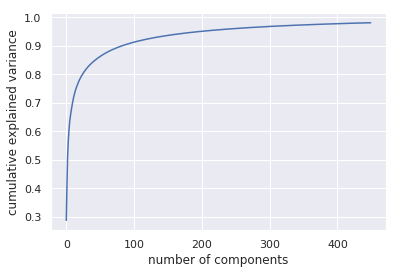

In [0]:
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
#from sklearn.datasets import fetch_lfw_people
#faces = fetch_lfw_people(min_faces_per_person=60)
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(450)
pca.fit(dev_images_raw)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
# Compute the components and projected faces
#pca = RandomizedPCA(150).fit(faces.data)

#projected = pca.inverse_transform(components)

In [0]:
pca = RandomizedPCA(450)
pca.fit(dev_images_raw)
dev_components = pca.transform(dev_images_raw)
train_components = RandomizedPCA(450).fit(train_images).transform(train_images)


In [0]:
lab_enc = preprocessing.OrdinalEncoder()
encoded = lab_enc.fit_transform(np.round(train_left_eye_x,0).reshape(-1, 1) )
lab_enc = preprocessing.OrdinalEncoder(categories=lab_enc.categories_)
dev_encoded = lab_enc.fit_transform(np.round(dev_left_eye_x,0).reshape(-1, 1) )

In [0]:
print ("logistic regression")
logisticModel=LogisticRegression(solver='saga',multi_class='auto', penalty="l1", C=50)
reg = logisticModel.fit(dev_components, dev_encoded)
logistic_pred=reg.predict(train_components)


logistic regression


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Logistic Regression f1-score  0.01970909008427893
[0.] 1800 [50.]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


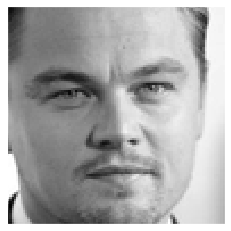

In [0]:
from sklearn.metrics import classification_report
output2 = classification_report(encoded, logistic_pred, output_dict=True)
print( "Logistic Regression f1-score ",output2.get('macro avg').get('f1-score'))
print(min(encoded), np.argmin(encoded),max(encoded))
#train_images()

ax = plt.subplot(1,1,1)
ax.imshow(train_images[np.argmin(encoded)].reshape(96,96),cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [0]:
from sklearn.metrics import confusion_matrix
#print(classification_report(encoded, logistic_pred, output_dict=False))
confusion_matrix(encoded, logistic_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
import seaborn as sns; sns.set()

train_df.dtypes

In [0]:
feature = 'left_eye_center_x'

y = np.array(train[feature].values)
X = train.Image.values


In [0]:
print("length y: ",len(y)) # labe
print("shape X: ",X.shape) # of images
print('shape X[1]', X[1].shape) # each image (96*96)



In [0]:

# NB = BernoulliNB()
# NB_fit = NB.fit(X, y)
# NB_pred = NB_fit.predict(dev_left_eye_x)
# print(classification_report(dev_left_eye_x, NB_pred))

In [0]:
'''from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('ordinal_encoder', OrdinalEncoder()),
    ('classifier', RandomForestClassifier(criterion='gini', n_estimators=100))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Construct model
model = pipe.fit(X_train, y_train)

# Show results
print("Hold-out AUC score: %.3f" %roc_auc_score(model.predict_proba(X_test),y_test)'''

In [0]:
'''class sklearn.linear_model.SGDRegressor(loss='squared_loss', penalty='l2', 
                                        alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                                        max_iter=1000, tol=0.001, shuffle=True, verbose=0,
                                        epsilon=0.1, random_state=None, learning_rate='invscaling', 
                                        eta0=0.01, power_t=0.25, early_stopping=False, 
                                        validation_fraction=0.1, n_iter_no_change=5, warm_start=False,
                                        average=False)
'''
from sklearn import linear_model 
sgd=linear_model.SGDRegressor(penalty='l1')
sgd_model=sgd.fit(dev_components, dev_left_eye_x)
sgd_pred=reg.predict(train_components)

In [0]:
print("The coefficient of determination R^2 of the prediction. ", sgd_model.score(train_components,train_left_eye_x))
#output2 = classification_report(train_left_eye_x, logistic_pred, output_dict=True)
#print( "Logistic Regression f1-score ",output2.get('macro avg').get('f1-score'))
#print(min(encoded), np.argmin(encoded),max(encoded))

Returns the coefficient of determination R^2 of the prediction.  -0.5210202829081785


In [0]:
from sklearn import linear_model 
sgd=linear_model.SGDRegressor(penalty='l1')
sgd_model=sgd.fit(train_components, train_left_eye_x)
sgd_pred=reg.predict(dev_components)
print("The coefficient of determination R^2 of the prediction. ", sgd_model.score(dev_components,dev_left_eye_x))

The coefficient of determination R^2 of the prediction.  -0.5214566581595053


In [0]:
#rom sklearn import linear_model 
sgd=linear_model.SGDRegressor(penalty='l1')
sgd_model=sgd.fit(train_images, train_left_eye_x)
sgd_pred=sgd_model.predict(dev_images_raw)
print("The coefficient of determination R^2 of the prediction. ", sgd_model.score(dev_images_raw,dev_left_eye_x))

The coefficient of determination R^2 of the prediction.  -3.8518723933044337e+18


In [0]:
from sklearn import svm
'''class sklearn.svm.SVR(kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0,
                      tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, 
                      verbose=False, max_iter=-1)
                      '''
'''"Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.
The implementation is based on libsvm. The fit time complexity is more than quadratic
with the number of samples which makes it hard to scale to datasets with more than a 
couple of 10000 samples. For large datasets consider using sklearn.linear_model.LinearSVR 
or sklearn.linear_model.SGDRegressor instead, possibly after a 
sklearn.kernel_approximation.Nystroem transformer.
"
svr'''
svr=svm.SVR(kernel='rbf',tol=0.01,C=64)
svr_model=svr.fit(train_images, train_left_eye_x)
svr_pred=svr_model.predict(dev_images_raw)
print("The coefficient of determination R^2 of the prediction. ", svr_model.score(dev_images_raw,dev_left_eye_x))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The coefficient of determination R^2 of the prediction.  0.11197525945303788


In [0]:
svr=svm.SVR(kernel='rbf',C=64)
svr_model=svr.fit(train_components, train_left_eye_x)
svr_pred=svr_model.predict(dev_components)
print("The coefficient of determination R^2 of the prediction. ", svr_model.score(dev_components,dev_left_eye_x))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The coefficient of determination R^2 of the prediction.  -0.3788075768634338


In [0]:
dev_left_eye=dev[['left_eye_center_y','left_eye_center_x']].values
train_left_eye=train[['left_eye_center_y','left_eye_center_x']].values
svr=svm.SVR(kernel='rbf')
svr_model=svr.fit(train_components, train_left_eye)
svr_pred=svr_model.predict(dev_components)
print("The coefficient of determination R^2 of the prediction. ", svr_model.score(dev_components,dev_left_eye))

ValueError: ignored

In [0]:
C= {'C': [ 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32, 64, 128, 256]}
gridSearch = GridSearchCV(svr, param_grid=C, cv=3, iid=True)
gridSearchfit=gridSearch.fit(train_components, train_left_eye_x)
print("Naive bayes best score and best param",gridSearchfit.best_score_,gridSearchfit.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

Naive bayes best score and best param 0.32848829763984433 {'C': 64}


In [0]:
'''class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False,
                                 copy_X=True, max_iter=None, tol=0.001, 
                                 solver='auto', random_state=None)'''
dev_left_eye=dev[['left_eye_center_y','left_eye_center_x']].values
train_left_eye=train[['left_eye_center_y','left_eye_center_x']].values
print(dev_left_eye.shape)
ridge=linear_model.Ridge()
ridge_model=ridge.fit(train_components, train_left_eye)
ridge_pred=ridge_model.predict(dev_components)
print("The coefficient of determination R^2 of the prediction. ", ridge_model.score(dev_components,dev_left_eye))

(1763, 2)
The coefficient of determination R^2 of the prediction.  -0.5801441968713721


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [0]:
dev_eyes=dev[['left_eye_center_y','left_eye_center_x','right_eye_center_y','right_eye_center_x']].values
train_eyes=train[['left_eye_center_y','left_eye_center_x','right_eye_center_y','right_eye_center_x']].values
print(dev_left_eye.shape)
ridge=linear_model.Ridge()
ridge_model=ridge.fit(train_components, train_eyes)
ridge_pred=ridge_model.predict(dev_components)
print("The coefficient of determination R^2 of the prediction. ", ridge_model.score(dev_components,dev_eyes))

(1763, 2)
The coefficient of determination R^2 of the prediction.  -0.554909600399428


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [0]:
pca = RandomizedPCA(1000)
pca.fit(dev_images_raw)
dev_components = pca.transform(dev_images_raw)
train_components = RandomizedPCA(1000).fit(train_images).transform(train_images)


dev_left_eye=dev[['left_eye_center_y','left_eye_center_x']].values
train_left_eye=train[['left_eye_center_y','left_eye_center_x']].values
print(dev_left_eye.shape)
ridge=linear_model.Ridge()
ridge_model=ridge.fit(train_components, train_left_eye)
ridge_pred=ridge_model.predict(dev_components)
print("The coefficient of determination R^2 of the prediction. ", ridge_model.score(dev_components,dev_left_eye))

(1763, 2)
The coefficient of determination R^2 of the prediction.  -0.6656110929107455


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [0]:
import keras
import cv2
from PIL import Image


In [0]:
train_images[10].reshape(96,96).shape
print(type(train_images[10][1]))
print(train_images[10][1])
print(max(train_images[10]))
#rint(type(scipy.misc.toimage()))
#img = scipy.misc.toimage(train_images[10], mode='F')

<class 'numpy.float64'>
0.3137254901960784
0.8901960784313725


In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('My Drive/colabs')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1kEPKEp1O3DZZ8iwkayXyP_LDQ5Z-ij3a' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile('haarcascade_frontalface_default.xml')


with open(fname, 'r') as f:
  print(f.read())
  

W0726 02:33:17.938928 140155154188160 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

title: Copy of w207_final.ipynb, id: 1oS7csOWV1Iw1nvtsyA7wSMqO8xM85o2G
downloading to My Drive/colabs/Copy of w207_final.ipynb
title: haarcascade_frontalface_default.xml, id: 1ZiANTMdT44HWOLDMfkE336jYicc8DQHS
downloading to My Drive/colabs/haarcascade_frontalface_default.xml
title: Rodrigo_Luna_p3_python3_data_version.ipynb, id: 1e1rJ3OJAOyMQCMDHZ-kABuBzl0ByVAeh
downloading to My Drive/colabs/Rodrigo_Luna_p3_python3_data_version.ipynb
title: Copy of w207_final.ipynb, id: 1Yq2knKB-N-rOA4OobXdSv-OYVW_V8Trm
downloading to My Drive/colabs/Copy of w207_final.ipynb
title: Copy of w207_final.ipynb, id: 1h4BJ1G6LyrCZ4DMrqQGJ2OsSqQlRCwBj
downloading to My Drive/colabs/Copy of w207_final.ipynb
title: Rodrigo_Luna_p2.ipynb, id: 1JabtIqmuuQxjgII2NxP-QOO07c1qUq7L
downloading to My Drive/colabs/Rodrigo_Luna_p2.ipynb
title: rodrigo_luna_p1.ipynb, id: 1hknyZgZpEvuQVfuAAqu6cheAKZMcAiLE
downloading to My Drive/colabs/rodrigo_luna_p1.ipynb
title: firstname_lastname_p1.rodrigo.luna.ipynb, id: 1lPckhivd6UT

FileNotDownloadableError: ignored

In [0]:
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link="https://drive.google.com/file/d/1ZiANTMdT44HWOLDMfkE336jYicc8DQHS/view?usp=sharing"
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('haarcascade_frontalface_default.xml') 

W0726 02:21:08.376716 140155154188160 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

sharing


ApiRequestError: ignored

In [0]:
from google.colab import files
files.download("haarcascade_frontalface_default.xml")

In [0]:
#!cd 'My Drive'/colabs
!ls "'My Drive'/colabs/haarcascade_frontalface_default.xml'

'Copy of w207_final.ipynb'
 firstname_lastname_p1.rodrigo.luna.ipynb
 haarcascade_frontalface_default.xml
 rodrigo_luna_p1.ipynb
 Rodrigo_Luna_p2.ipynb
 Rodrigo_Luna_p3_python3_data_version.ipynb


In [0]:
link="https://drive.google.com/file/d/1ZiANTMdT44HWOLDMfkE336jYicc8DQHS/view?usp=sharing"
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('haarcascade_frontalface_default.xml') 

sharing


ApiRequestError: ignored

In [0]:

#You can mount your Google Drive files by running the following code snippet:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2019-07-26 03:13:54--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.08s   

Last-modified header missing -- time-stamps turned off.
2019-07-26 03:13:54 (11.8 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [0]:
!wget -N https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_eye.xml

--2019-07-26 03:25:27--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_eye.xml
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml [following]
--2019-07-26 03:25:27--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.05s   

Last-modified header missing -- time-stamps turned off.
2019-07-26 03

In [0]:
#img = Image.fromarray(np.float32(train_images[10].reshape(96,96)), mode='F')
#from cv2 import cv
formatted = (np.float32(train_images[10].reshape(96,96)) * 255).astype('uint8')
img = Image.fromarray(formatted)
#grayscale_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#face_cascade=cv2.CascadeClassifier("'My Drive'/colabs/haarcascade_frontalface_default.xml")
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
bounding_boxes = face_cascade.detectMultiScale(formatted, 1.25, 6)


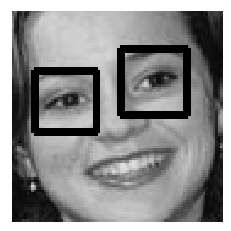

In [0]:
# faces = face_cascade.detectMultiScale(gray, 1.3, 5)
bounding_boxes = face_cascade.detectMultiScale(formatted, 1.25, 6)
for (x,y,w,h) in bounding_boxes:
  cv2.rectangle(formatted,(x,y),(x+w,y+h),(255,0,0),2)
  roi_gray = formatted[y:y+h, x:x+w]
  #oi_color = img[y:y+h, x:x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
ax = plt.subplot(1,1,1)
ax.imshow(roi_gray,cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [0]:
dev_images_raw.shape


NameError: ignored

In [0]:
dev_formatted = (np.float32(dev_images_raw.reshape(1763,96,96)) * 255).astype('uint8')
bounded_images=[]
eyes_len=[]
for formatted in dev_formatted:
  bounding_boxes = face_cascade.detectMultiScale(formatted, 1.25, 6)
  for (x,y,w,h) in bounding_boxes:
    cv2.rectangle(formatted,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = formatted[y:y+h, x:x+w]
    #oi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    eyes_len.append(len(eyes))
    for (ex,ey,ew,eh) in eyes:
      cv2.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
  bounded_images.append(formatted)

0.8706749858196257

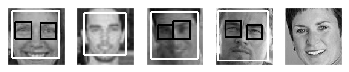

In [0]:
def plot_example(num_examples):
  
  for i in range(num_examples):
    ax = plt.subplot(1,num_examples,i+1)
    ax.imshow(bounded_images[i*5],cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plot_example(5)
np.sum(eyes_len)/dev_images_raw.shape[0]

In [0]:
model = Sequential()

model.add(BatchNormalization(input_shape=(96, 96, 1)))
model.add(Convolution2D(24, 5, 5, border_mode="same", init='he_normal', input_shape=(96, 96, 1), dim_ordering='tf'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))

model.add(Convolution2D(36, 5, 5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))

model.add(Convolution2D(48, 5, 5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))

model.add(GlobalAveragePooling2D());

model.add(Dense(500, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(30))

NameError: ignored

In [0]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='face_model.h5', verbose=1, save_best_only=True)

epochs = 30

hist = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

NameError: ignored

In [0]:
features = model.predict(region, batch_size=1)